# Value Iteration

## Introduction
Value iteration is a dynamic programming algorithm used for optimal sequential decision making. Using value iteration, we can build a plan for the optimal action to take in every possible situation (state). The perceived worth of an immediate action is based on an evaluation of how good that action is in the long run. In practice, dynamic programming is often difficult to implement because it is computationally expensive and requires that the dynamics of the environment are completely known. However, it serves as the fundamental structure for understanding many of the later algorithms developed for reinforcement learning.

### Markov Decision Processes
The interaction between an agent and its environment is formulated as a Markov Decision Process (MDP) where we assume a finite set of states $\mathcal{S}$, actions $\mathcal{A}$, and numerical rewards $\mathcal{R}$:$\mathcal{S}\times \mathcal{A} \times \mathcal{S} \rightarrow \mathbb{R}$, a function of state, action, next state tuple. The dynamics, $\mathcal{T}: \mathcal{S} \times \mathcal{S} \times \mathcal{A} \rightarrow [0, 1]$, can be described by a function $p(s^\prime | s, a), \: \forall s \in \mathcal{S}, a \in \mathcal{A},  s^\prime \in \mathcal{S}$.  If the task is episodic (i.e. can be broken into natural subsequences with a clear ending point) than $s^\prime \in \mathcal{S}^+$ where $\mathcal{S}^+$ contains $\mathcal{S}$ as well as terminal or end states. Here we will treat the task as a continuing one.

### Value Iteration
Value iteration finds the optimal policy for each state action pair in the space. The Q-values corresponding to the optimal policy can be represented as:
    $$ q_*(s, a) = \mathbb{E}[R_{t+1} + \gamma \max_{a^\prime} q_*(S_{t+1}, a^\prime)| S_t = s, A_t = a] $$
    $$  = \sum_{s^\prime, r}p(r, s^\prime| s, a)[r +\gamma \max_{a^\prime} q_*(s^\prime, a^\prime)]  $$

Finding the optimal policy requires two pieces: being able to evaluate a policy and improving on it. To evaluate a policy, we estimate the value of the states under that policy. Once we evaluate a policy, we want to know whether to stick with the policy or if doing something different would lead to improvements. If we can find an action to take for even one of the states that leads to higher accumulated expected rewards than our current policy, that new policy is better than the existing one. Thus, in value iteration we go through each state and perform evaluation and improvement simultaneously until convergence. At each step of the algorithm, the value function is equivalent to the expected accumulation of rewards from following a particular policy.

We use $\sum_{s^\prime, r} p(s^\prime, r | s, a)[r + \gamma V(s^\prime)]$ to quantify how good each possible action is for the current state (evaluation) and choose the action that maximizes that value  using $\underset{a}{\max}$ (improvement).

Thus at each iteration (until convergence) we update the value of each state:
$$ V(s)_{k+1} = \sum_a \pi(a|s)  \sum_{s^\prime, r}P(s^\prime, r|s, a)[r + \gamma v(s^\prime)]$$


## Included in the Demo
This demo performs value iteration and visualizes the resulting policies and state values in a 2D world. Inputs include a discrete transition table, $P(s^\prime s, a)$, a reward function $R(s,a)$ and discounting factor $\gamma$.
Outputs are a policy $\pi(a|s)$ which can be visualized in the demo examples as probabilistic arrows on a 2D grid.
                                                                                              

In [1]:
import sys
sys.path.append('../')
from SetupTransitionTable import SetupDeterministicTransitionByGrid, SetupSlipperyTransitionByGrid
from SetupRewardTable import SetupRewardTableWithDistanceMoveCost
from visualizations import *

import numpy as np
import itertools
from ValueIterationSolution import ValueIteration

# Examples

## Example 1: Setup Deterministic Transition

### Environmental Parameters and example environment
Red Squares represent trap states, green squares are goal states.

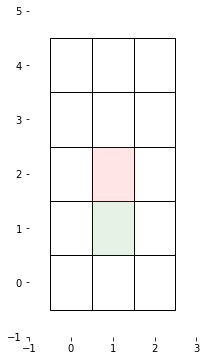

In [2]:
gridWidth = 3
gridHeight = 5
allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]
goalState = (1,1)
trapState = (1,2)
stateSet = list(itertools.product(range(gridWidth), range(gridHeight)))
visualizeEnvironmentByState(states= stateSet, 
                            goalStates = [goalState], 
                            trapStates = [trapState])

In [3]:
np.random.seed(1000)
getTransition = SetupDeterministicTransitionByGrid(gridWidth, gridHeight, allActions)
transition = getTransition()

getReward = SetupRewardTableWithDistanceMoveCost(transition, allActions, [goalState], [trapState])
reward = getReward()

value = {state:0 for state in reward.keys()}

#run value iteration
performValueIteration = ValueIteration(transition, reward, value, .000001, .9)
optimalValues, policy = performValueIteration()

### Examples of selected Transition Table States

In [4]:
#Examples of state transition for (0,0)
# Note that taking an action off the board leaves you in place
viewDictionaryStructure(transition[(0,0)], 't')

state: (1, 0)
	action: (1, 0)
		next state: 1
state: (0, 1)
	action: (0, 1)
		next state: 1
state: (-1, 0)
	action: (0, 0)
		next state: 1
state: (0, -1)
	action: (0, 0)
		next state: 1
state: (0, 0)
	action: (0, 0)
		next state: 1


In [5]:
#Transition for state (2,2)
#Deterministic transition => P(s') = 1 if it is possible to move there
viewDictionaryStructure(transition[(2,2)], 't')

state: (1, 0)
	action: (2, 2)
		next state: 1
state: (0, 1)
	action: (2, 3)
		next state: 1
state: (-1, 0)
	action: (1, 2)
		next state: 1
state: (0, -1)
	action: (2, 1)
		next state: 1
state: (0, 0)
	action: (2, 2)
		next state: 1


### Examples of Selected State Action Rewards

In [6]:
#Reward for trap state
viewDictionaryStructure(reward[(1,2)], 'r')

state: (1, 0)
	action: (2, 2)
		next state: -100
state: (0, 1)
	action: (1, 3)
		next state: -100
state: (-1, 0)
	action: (0, 2)
		next state: -100
state: (0, -1)
	action: (1, 1)
		next state: -100
state: (0, 0)
	action: (1, 2)
		next state: -100


In [7]:
#reward structure for typical state
viewDictionaryStructure(reward[(1,0)], 'r')

state: (1, 0)
	action: (2, 0)
		next state: -1
state: (0, 1)
	action: (1, 1)
		next state: -1
state: (-1, 0)
	action: (0, 0)
		next state: -1
state: (0, -1)
	action: (1, 0)
		next state: -1
state: (0, 0)
	action: (1, 0)
		next state: -0.1


### Final Optimal State Values after Value Iteration

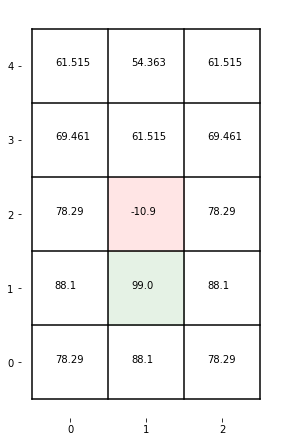

In [8]:
visualizeValueTable(gridWidth, gridHeight, goalState, [trapState], optimalValues)

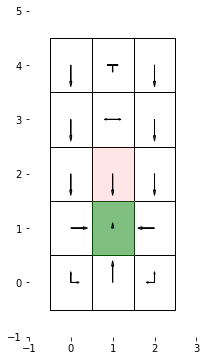

In [9]:
visualizePolicy(stateSet, policy, (1,1),[], [(1,2)])

In [10]:
policy

{(0, 0): {(1, 0): 0.5, (0, 1): 0.5},
 (0, 1): {(1, 0): 1.0},
 (0, 2): {(0, -1): 1.0},
 (0, 3): {(0, -1): 1.0},
 (0, 4): {(0, -1): 1.0},
 (1, 0): {(0, 1): 1.0},
 (1, 1): {(0, 0): 1.0},
 (1, 2): {(0, -1): 1.0},
 (1, 3): {(1, 0): 0.5, (-1, 0): 0.5},
 (1, 4): {(1, 0): 0.3333333333333333,
  (-1, 0): 0.3333333333333333,
  (0, -1): 0.3333333333333333},
 (2, 0): {(0, 1): 0.5, (-1, 0): 0.5},
 (2, 1): {(-1, 0): 1.0},
 (2, 2): {(0, -1): 1.0},
 (2, 3): {(0, -1): 1.0},
 (2, 4): {(0, -1): 1.0}}

## Example 2: Stochastic

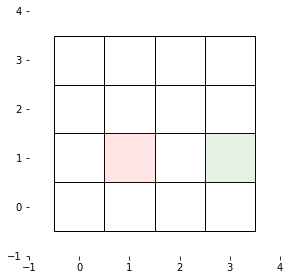

In [11]:
gridWidth = 4
gridHeight = 4
allActions = [(1,0), (0,1), (-1,0), (0,-1), (0,0)]
goalState = (3,1)
trapState = (1,1)
stateSet = list(itertools.product(range(gridWidth), range(gridHeight)))
visualizeEnvironmentByState(states= stateSet, 
                            goalStates = [goalState], 
                            trapStates = [trapState])

In [12]:
np.random.seed(1000)
getTransition = SetupSlipperyTransitionByGrid(gridWidth, gridHeight, allActions)
transition = getTransition()

getReward = SetupRewardTableWithDistanceMoveCost(transition, allActions, [goalState], [trapState])
reward = getReward()

value = {state:0 for state in reward.keys()}


performValueIteration = ValueIteration(transition, reward, value, .0001, .9)
optimalValues, policy = performValueIteration()

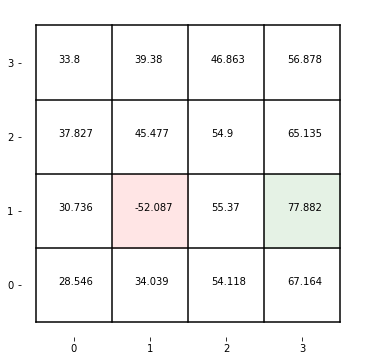

In [13]:
visualizeValueTable(gridWidth, gridHeight, goalState, [trapState], optimalValues)

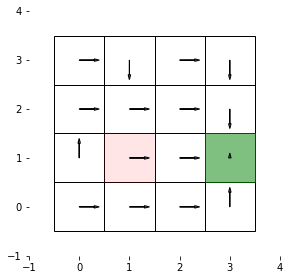

In [14]:
visualizePolicy(stateSet, policy, (3,1),[], [(1,1)])

In [15]:
policy

{(0, 0): {(1, 0): 1.0},
 (0, 1): {(0, 1): 1.0},
 (0, 2): {(1, 0): 1.0},
 (0, 3): {(1, 0): 1.0},
 (1, 0): {(1, 0): 1.0},
 (1, 1): {(1, 0): 1.0},
 (1, 2): {(1, 0): 1.0},
 (1, 3): {(0, -1): 1.0},
 (2, 0): {(1, 0): 1.0},
 (2, 1): {(1, 0): 1.0},
 (2, 2): {(1, 0): 1.0},
 (2, 3): {(1, 0): 1.0},
 (3, 0): {(0, 1): 1.0},
 (3, 1): {(0, 0): 1.0},
 (3, 2): {(0, -1): 1.0},
 (3, 3): {(0, -1): 1.0}}